In [4]:
import pandas as pd

# Load the dataset
df=pd.read_csv('projectdata1.csv')

# Display the first two rows of the dataframe
df.head(2)

,cycle_length,week,ID,mood,days_from period,menstrual_symptoms,ovulation_symptoms,Abdominal cramps,Fatigue,Nausea,Cravings,Headaches,Aversions,Backaches,Bloating,Irritability,Mood swings,Diarrhea,Increased sex drive
0,26.0,mood_one,1,3,2,"['Abdominal cramps', 'Fatigue', 'Nausea', 'Cra...",NaN,1,1,1,1,1,1,1,1,1,1,0,0
1,30.0,mood_one,2,2,6,"['Abdominal cramps', 'Fatigue', 'Nausea', 'Hea...",NaN,1,1,1,0,1,0,0,1,1,1,0,0


In [5]:
import pandas as pd

#bootstrapping to increase dataset size to 500 rows
df=df.sample(n=500, replace=True, random_state=42)


In [6]:
#Selecting feature variables
features=df.drop(['week', 'menstrual_symptoms','ovulation_symptoms','mood'], axis=1)
features.columns

Index(['cycle_length', 'ID', 'days_from period', 'Abdominal cramps', 'Fatigue',
       'Nausea', 'Cravings', 'Headaches', 'Aversions', 'Backaches', 'Bloating',
       'Irritability', 'Mood swings', 'Diarrhea', 'Increased sex drive'],
      dtype='object')

In [7]:
target=df['mood']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [9]:
#splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [11]:
model=DecisionTreeRegressor(random_state=42)

In [12]:
#fitting the model
model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [13]:
#predicting the test set results
mood_predictions=model.predict(x_test)

In [14]:
#performance on the training data
print("R²:", model.score(x_train, y_train))

R²: 1.0


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

#performance on the test data
print("MSE:", mean_squared_error(y_test, mood_predictions))
print("R²:", r2_score(y_test, mood_predictions))


MSE: 0.04
R²: 0.9941414259769172


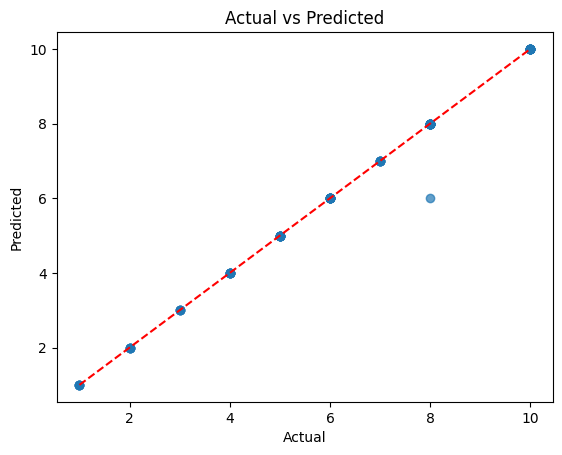

In [ ]:
#plotting real values vs predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, mood_predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


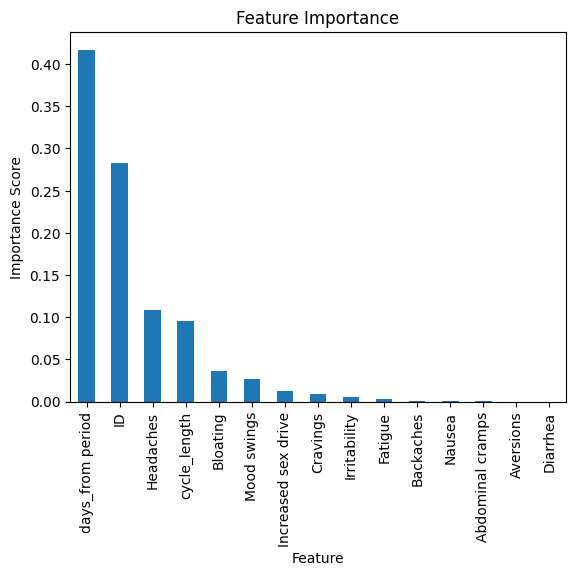

In [ ]:
#plotting feature importance
import pandas as pd
import matplotlib.pyplot as plt

importance=model.feature_importances_
features=x_train.columns

# dataframe for visualization
feat_importance=pd.DataFrame({'Feature': features, 'Importance': importance})
feat_importance=feat_importance.sort_values(by='Importance', ascending=False)

feat_importance.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.show()